# Novozymes Enzyme Stability Prediction

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)

In [2]:
#new
train = pd.read_csv("train.csv")
t_updates = pd.read_csv("train_updates_20220929.csv")

In [3]:
train.isna().sum()

seq_id               0
protein_sequence     0
pH                   1
data_source         41
tm                   0
dtype: int64

In [4]:
t_updates.isna().sum()

seq_id                 0
protein_sequence    2409
pH                  2409
data_source         2434
tm                  2409
dtype: int64

In [5]:
train.isna().mean()*100

seq_id              0.000000
protein_sequence    0.000000
pH                  0.099900
data_source         4.095904
tm                  0.000000
dtype: float64

In [6]:
t_updates.isna().mean()*100

seq_id                0.000000
protein_sequence     98.972884
pH                   98.972884
data_source         100.000000
tm                   98.972884
dtype: float64

In [7]:
dft=pd.DataFrame(train)

In [8]:
nullt=dft[dft.isna().any(axis=1)]
nullt

,seq_id,protein_sequence,pH,data_source,tm
69,69,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKARAAALDAQKATPP...,5.0,NaN,25.0
70,70,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
71,71,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
72,72,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
73,73,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
74,74,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
75,75,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
76,76,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
77,77,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
78,78,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0


In [9]:
dft['pH']=dft['pH'].fillna('7')

In [10]:
dft[dft['pH']==5]

,seq_id,protein_sequence,pH,data_source,tm
69,69,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKARAAALDAQKATPP...,5.0,NaN,25.0
70,70,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
71,71,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
72,72,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
73,73,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
74,74,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
75,75,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
76,76,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
77,77,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0
78,78,ADLEDNWETLNDNLKVIEKADNAAQVKDALTKMRAAALDAQKATPP...,5.0,NaN,25.0


In [11]:
dft.loc[dft['pH']==5]=dft.loc[dft['pH']==5].fillna(value="10.1515/BC.2006.038")

In [12]:
dft.isna().mean()*100

seq_id              0.000000
protein_sequence    0.000000
pH                  0.000000
data_source         2.697303
tm                  0.000000
dtype: float64

In [13]:
dft[dft['pH']==7]

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
5,5,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,doi.org/10.1038/s41592-020-0801-4,48.4
6,6,AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...,7.0,doi.org/10.1038/s41592-020-0801-4,45.7
7,7,AAENRPPIPGSLGMLYDSTLCVGCQACVTKCQDINFPERNPQGEQT...,7.0,doi.org/10.1038/s41592-020-0801-4,55.9
8,8,AAEYAVVLKTLSNPFWVDMKKGIEDEAKTLGVSVDIFASPSEGDFQ...,7.0,doi.org/10.1038/s41592-020-0801-4,48.1
9,9,AAFQVTSNEIKTGEQLTTSHVFSGFGCEGGNTSPSLTWSGVPEGTK...,7.0,doi.org/10.1038/s41592-020-0801-4,49.7


In [14]:
dft.loc[dft['pH']==7]=dft.loc[dft['pH']==7].fillna(value="doi.org/10.1038/s41592-020-0801-4")

In [15]:
dft.isna().mean()*100

seq_id              0.000000
protein_sequence    0.000000
pH                  0.000000
data_source         1.698302
tm                  0.000000
dtype: float64

In [16]:
dft[dft['pH']==7.4]

,seq_id,protein_sequence,pH,data_source,tm
863,863,DIVMTQSPSSLSVSAGERVTISCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0
864,864,DIVMTQSPSSLSVSAGERVTLSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0
865,865,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0
866,866,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0
867,867,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0
868,868,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0
869,869,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0
870,870,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0
871,871,DIVMTQSPSSLSVSAGERVTMSCKSSQSLLNSGNQKNYLAWYQQKP...,7.4,NaN,20.0
872,872,DIVMTQSPSSLSVSAGERVTMSCRSSQSLLNSGNQKNFLAWYQQKP...,7.4,NaN,20.0


In [17]:
dft.loc[dft['pH']==7.4]=dft.loc[dft['pH']==7.4].fillna(value="10.1021/bi034798l")

In [18]:
dft.isna().mean()*100

seq_id              0.000000
protein_sequence    0.000000
pH                  0.000000
data_source         0.599401
tm                  0.000000
dtype: float64

In [19]:
dft[dft['pH']==5.5]

,seq_id,protein_sequence,pH,data_source,tm
991,991,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,5.5,10.1110/ps.03176803,56.9


In [20]:
dft.loc[dft['pH']==5.5]=dft.loc[dft['pH']==5.5].fillna(value="10.1110/ps.03176803")

In [21]:
dft.isna().mean()*100

seq_id              0.000000
protein_sequence    0.000000
pH                  0.000000
data_source         0.599401
tm                  0.000000
dtype: float64

In [22]:
dft[dft['pH']==6.5]

,seq_id,protein_sequence,pH,data_source,tm


In [23]:
dft.loc[dft['pH']==6.5]=dft.loc[dft['pH']==6.5].fillna(value="10.1002/prot.10488")

In [24]:
dft.isna().mean()*100

seq_id              0.000000
protein_sequence    0.000000
pH                  0.000000
data_source         0.599401
tm                  0.000000
dtype: float64

In [25]:
dft[dft['pH']==8]

,seq_id,protein_sequence,pH,data_source,tm


In [26]:
dft.loc[dft['pH']==8]=dft.loc[dft['pH']==8].fillna(value="10.1016/j.jmb.2003.08.035")

In [27]:
dft.isna().mean()*100

seq_id              0.000000
protein_sequence    0.000000
pH                  0.000000
data_source         0.599401
tm                  0.000000
dtype: float64

In [28]:
dft[dft['pH']==2.7]

,seq_id,protein_sequence,pH,data_source,tm


In [29]:
dft.loc[dft['pH']==2.7]=dft.loc[dft['pH']==2.7].fillna(value="10.1046/j.1432-1327.1999.00918.x")

In [30]:
dft.isna().mean()*100

seq_id              0.000000
protein_sequence    0.000000
pH                  0.000000
data_source         0.599401
tm                  0.000000
dtype: float64

In [31]:
dft[dft['pH']==6.3]

,seq_id,protein_sequence,pH,data_source,tm
992,992,DVSGTVCLSALPPEATDTLNLIASDGPFPYSQDGVVFANRESVLPT...,6.3,NaN,51.9


In [32]:
dft.loc[dft['pH']==6.3]=dft.loc[dft['pH']==6.3].fillna(value="10.1021/bi0362267")

In [33]:
dft.isna().mean()*100

seq_id              0.0000
protein_sequence    0.0000
pH                  0.0000
data_source         0.4995
tm                  0.0000
dtype: float64

In [34]:
dft[dft['pH']==5.3]

,seq_id,protein_sequence,pH,data_source,tm


In [35]:
dft.loc[dft['pH']==5.3]=dft.loc[dft['pH']==5.3].fillna(value="10.1016/0022-2836(91)80181-s")

In [36]:
dft.isna().mean()*100

seq_id              0.0000
protein_sequence    0.0000
pH                  0.0000
data_source         0.4995
tm                  0.0000
dtype: float64

In [37]:
dft['data_source']=dft['data_source'].fillna('10.1021/bi0362267')

In [38]:
dft.isna().mean()*100

seq_id              0.0
protein_sequence    0.0
pH                  0.0
data_source         0.0
tm                  0.0
dtype: float64

In [39]:
bins = [0,6263,12526,18789,25052,31389]
group_names=['A','B','C','D','E']
dft['group']= pd.cut(dft["seq_id"],bins,labels = group_names)

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [41]:
# Basic library
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score

# Scaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Cross-Validation
from sklearn.model_selection import StratifiedKFold

#  For Modelling
from sklearn.model_selection import train_test_split
import xgboost

In [42]:
# Load the training, testing and submission data
TRAIN = "train.csv"
TEST = "test.csv"
SUBMISSION = "sample_submission.csv"

df_train = pd.read_csv(TRAIN)
df_test = pd.read_csv(TEST)
df_submission = pd.read_csv(SUBMISSION)

print('Shape of the training dataset {}'.format(df_train.shape))
print('Shape of the testing dataset {}'.format(df_test.shape))
print('Shape of the submission dataset {}'.format(df_submission.shape))

Shape of the training dataset (1001, 5)
Shape of the testing dataset (650, 4)
Shape of the submission dataset (1001, 2)


# Distribution of numerical variables

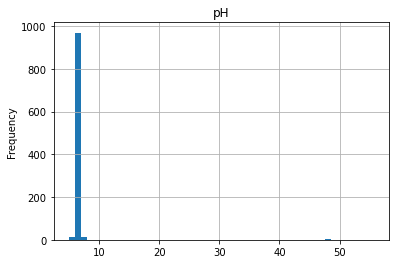

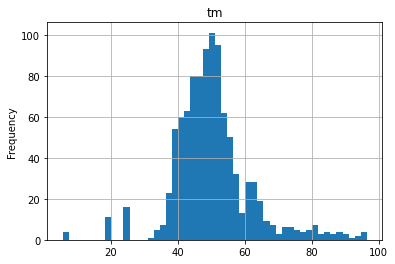

In [43]:
numerical = ['pH', 'tm']
%matplotlib inline
import matplotlib.pyplot as plt

for col in numerical:
    if pd.api.types.is_numeric_dtype(df_train[col]) == True:
        df_train[col].plot.hist(bins=50, grid=True, legend=None)
        plt.title(col)
        plt.show()

In [44]:
df_pH = df_train.pH
print('Shape of the pH temp dataset {}'.format(df_pH.shape))

Shape of the pH temp dataset (1001,)


# Remove outliers by percentile analysis

In [45]:
# Get the X% percentile of the pH to remove outlier and plot the distribution again 
pH_05 = df_pH.quantile(0.05)
pH_10 = df_pH.quantile(0.10)
pH_95 = df_pH.quantile(0.95)
pH_99 = df_pH.quantile(0.99)
print('p05 = {}, p10 = {}'.format(pH_05, pH_10))
print('p95 = {}, p99 = {}'.format(pH_95, pH_99))

p05 = 7.0, p10 = 7.0
p95 = 7.0, p99 = 7.4


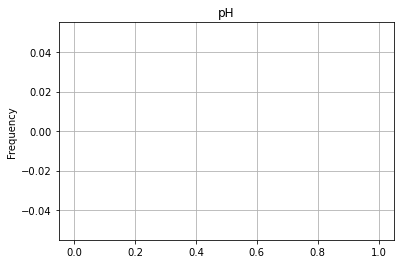

In [46]:
df_train[(df_train['pH']<pH_99) & (df_train['pH']>pH_05)]['pH'].plot.hist(bins=50, grid=True, legend=None)
plt.title('pH')
plt.show()

In [47]:
df_train['data_source'].value_counts()

doi.org/10.1038/s41592-020-0801-4    949
10.1093/protein/gzi054                 2
10.1074/jbc.M304177200                 2
10.1110/ps.03176803                    2
10.1021/bi9815243                      2
10.1038/nsb0894-518                    1
10.1016/j.jmb.2013.06.028              1
10.1016/j.jmb.2005.09.091              1
Name: data_source, dtype: int64

In [48]:
df_test['data_source'].value_counts()

Novozymes    650
Name: data_source, dtype: int64

In [49]:
# Get the X% percentile of the pH to remove outlier and plot the distribution again 
pH_05 = df_test['pH'].quantile(0.05)
pH_10 = df_test['pH'].quantile(0.10)
pH_95 = df_test['pH'].quantile(0.95)
pH_99 = df_test['pH'].quantile(0.99)
print('p05 = {}, p10 = {}'.format(pH_05, pH_10))
print('p95 = {}, p99 = {}'.format(pH_95, pH_99))

p05 = 8.0, p10 = 8.0
p95 = 8.0, p99 = 8.0


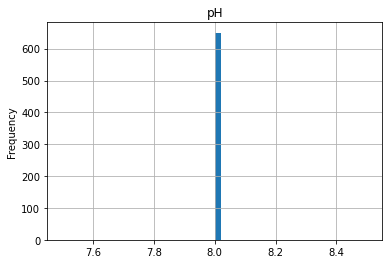

In [50]:
df_test['pH'].plot.hist(bins=50, grid=True, legend=None)
plt.title('pH')
plt.show()

In [51]:
# Now, we analyze if 1-letter sequence code is representative. E.g. we know that  L, A, V and G are popular sequence code 
Protein_Seq = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

Null_Seq = []

for col in Protein_Seq:
    if df_train['protein_sequence'].str.contains(col).sum() == 0 :
        print('{}: {}'.format(col, df_train['protein_sequence'].str.contains(col).sum()))
        Null_Seq.append(col)
        
print('Sequence with no occurence : {}'.format(Null_Seq))  

B: 0
J: 0
O: 0
U: 0
X: 0
Z: 0
Sequence with no occurence : ['B', 'J', 'O', 'U', 'X', 'Z']


In [52]:
# We only include non-zero 1-letter sequence code in the feature extraction
Letter_1_Seq = []

for i in Protein_Seq:
    if i not in Null_Seq:
        Letter_1_Seq.append(i)

print('1-letter Protein Sequence : {}'.format(Letter_1_Seq))

print('Size of training and testing dataset before extracting 1-letter sequence: {} and {}'.format(df_train.shape, df_test.shape))

for col in Letter_1_Seq:
#     print('{}: {}'.format(col, df_train['protein_sequence'].str.contains(col).sum()))
    df_train[col] = df_train['protein_sequence'].str.count(col)
    df_test[col] = df_test['protein_sequence'].str.count(col)
    
print('Size of training and testing dataset after extracting 1-letter sequence: {} and {}'.format(df_train.shape, df_test.shape))

1-letter Protein Sequence : ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
Size of training and testing dataset before extracting 1-letter sequence: (1001, 5) and (650, 4)
Size of training and testing dataset after extracting 1-letter sequence: (1001, 25) and (650, 24)


In [53]:
print(df_train.head(10)) 

   seq_id                                   protein_sequence   pH  \
0       0  AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...  7.0   
1       1  AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...  7.0   
2       2  AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...  7.0   
3       3  AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...  7.0   
4       4  AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...  7.0   
5       5  AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...  7.0   
6       6  AACFWRRTVIPKPPFRGISTTSARSTVMPAWVIDKYGKNEVLRFTQ...  7.0   
7       7  AAENRPPIPGSLGMLYDSTLCVGCQACVTKCQDINFPERNPQGEQT...  7.0   
8       8  AAEYAVVLKTLSNPFWVDMKKGIEDEAKTLGVSVDIFASPSEGDFQ...  7.0   
9       9  AAFQVTSNEIKTGEQLTTSHVFSGFGCEGGNTSPSLTWSGVPEGTK...  7.0   

                         data_source    tm   A   C   D   E   F  ...   M   N  \
0  doi.org/10.1038/s41592-020-0801-4  75.7  45   1  13  30  13  ...   8   5   
1  doi.org/10.1038/s41592-020-0801-4  50.5  28   0  10  52   6  ...   2   6   
2  

In [54]:
Protein_Seq = Letter_1_Seq

In [55]:
standardScaler = StandardScaler()
encoder_num = standardScaler.fit_transform(df_train[Protein_Seq])
encoded_num = pd.DataFrame(encoder_num, columns =Protein_Seq)
print(encoded_num.shape)
print(encoded_num.head(5))

(1001, 20)
          A         C         D         E         F         G         H  \
0  0.384264 -0.310590 -0.409185  0.108963 -0.285869  0.192679 -0.588959   
1 -0.200988 -0.357753 -0.513718  0.896484 -0.740392 -0.375678 -0.497372   
2  0.556396  0.066717  0.078635  0.180556  0.233586  0.959961  0.143740   
3 -0.476400 -0.121937 -0.200120  0.073166 -0.350801 -0.432513 -0.222610   
4  1.795753  0.302533  1.855693  1.827192  0.947836  1.499900  2.799776   

          I         K         L         M         N         P         Q  \
0 -0.383602 -0.374472 -0.074154 -0.079014 -0.664826 -0.171702 -0.624433   
1 -0.432331 -0.232967 -0.453839 -0.814765 -0.619154 -0.580051  0.159031   
2 -0.286144  0.710398 -0.589441 -0.324265 -0.208103 -0.090032  0.305930   
3 -0.578518 -0.327303 -0.318237 -0.814765 -0.482137 -0.253372 -0.477533   
4  2.393958  2.078277  1.742908  2.741365  2.075512  4.320132  1.725958   

          R         S         T         V         W         Y  
0  0.170484 -0.620260 -

# Model - XGBooster

In [56]:
X = encoded_num.copy()
y = df_train['tm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [10, 15, 20, 25],
        'min_child_weight': [5, 10, 20, 30],
        'subsample': [0.3, 0.5, 0.7],
        'colsample_bytree': [0.3, 0.5, 0.7],
        'n_estimators' : [500], # , 500, 750, 1000
        'objective': ['reg:squarederror']
    }
    
    xgb_model = xgboost.XGBRegressor()

    gsearch = RandomizedSearchCV(estimator = xgb_model,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 3,
                           n_iter=35, 
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [58]:
model_XGBoost = xgboost.XGBRegressor(n_estimators=500, max_depth=15, learning_rate= 0.001)

model_XGBoost.fit(X_train, y_train)

print('Model model_XGBoost Training is done!')

Model model_XGBoost Training is done!


# Spearman's rank correlation coefficient

In [60]:
from scipy import stats

y_pred_xgboost = model_XGBoost.predict(X_test)

stats.spearmanr(y_test, y_pred_xgboost)

SpearmanrResult(correlation=0.18646604319435686, pvalue=0.0011534167814139305)

In [61]:
print(y_pred_xgboost)
print(y_test)

[19.8576   19.8576   19.8576   20.287382 19.8576   21.405598 19.8576
 19.8576   17.65943  17.709034 19.891106  9.106236 19.8576   19.8576
 19.8576   20.02181  20.287382 19.8576   19.909319 18.506132 19.8576
 20.556997 20.556997 19.8576   21.937704 19.722605 18.375456 15.563154
 19.625137 19.8576   19.8576   20.287382 19.8576   19.8576   20.1211
 19.8576   19.643063 20.287382  9.174895 20.287382 14.620757 19.8576
 20.048347 19.8576   19.8576   19.8576   19.8576   19.8576   19.8576
 17.709034 19.8576   19.8576   19.8576   19.8576   19.891106 20.287382
 19.8576   19.722605 16.247261 20.287382 19.8576   19.8576   20.287382
 23.055923 20.307228 19.8576   19.78935  12.332805  9.106236 20.287382
 20.25601  19.8576   19.8576   19.891106 20.233744 19.8576   20.335451
 19.8576   19.722605 19.8576   19.8576   19.8576   19.722605 20.597975
 19.8576   19.8576   15.563154 20.410618 19.8576   20.556997 19.8576
 19.889547 20.287382 19.8576   21.174955 19.8576   19.447918 21.339169
 18.086695 20.084108

In [ ]:
#Score/Accuracy
print("Accuracy --> ", model_XGBoost.score(X_train, y_train)*100)

# Prediction

In [62]:
# Do the same data preparatioon for the test data
# Now, we analyze if 1-letter sequence code is representative. E.g. we know that  L, A, V and G are popular sequence code 

df_pred = df_test.copy()

encoded_num = standardScaler.transform(df_pred[Protein_Seq])

df_pred = pd.DataFrame(encoded_num, columns =Protein_Seq)

print(df_pred.head(5))

          A         C         D         E         F        G         H  \
0 -0.407547 -0.169100 -0.339497 -0.678559 -0.480664 -0.34726 -0.863722   
1 -0.407547 -0.169100 -0.339497 -0.714355 -0.480664 -0.34726 -0.863722   
2 -0.407547 -0.169100 -0.339497 -0.714355 -0.480664 -0.34726 -0.863722   
3 -0.407547 -0.121937 -0.339497 -0.714355 -0.480664 -0.34726 -0.863722   
4 -0.407547 -0.169100 -0.339497 -0.714355 -0.415732 -0.34726 -0.863722   

          I         K         L         M         N         P         Q  \
0 -0.773435  0.002874 -0.806403 -1.060016 -0.025414 -0.212537 -0.281667   
1 -0.773435  0.050043 -0.806403 -1.060016 -0.025414 -0.212537 -0.281667   
2 -0.773435  0.002874 -0.806403 -1.060016 -0.025414 -0.212537 -0.281667   
3 -0.773435 -0.044294 -0.779283 -1.060016 -0.025414 -0.212537 -0.281667   
4 -0.773435 -0.044294 -0.779283 -1.060016 -0.025414 -0.212537 -0.281667   

          R         S         T         V         W         Y  
0 -0.775925 -0.405507 -0.704475 -0.62550

In [63]:
submission = pd.DataFrame()
submission['seq_id'] = df_test['seq_id']
submission['tm'] =model_XGBoost.predict(df_pred)

print(submission.head(10))

submission.to_csv("submission.csv", index=False)
print('Submission Done')

   seq_id         tm
0   31390  20.161016
1   31391  20.161016
2   31392  20.161016
3   31393  20.161016
4   31394  20.161016
5   31395  20.161016
6   31396  20.161016
7   31397  19.857599
8   31398  20.161016
9   31399  20.161016
Submission Done
